### Create 
neural figures for paper

In [10]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params as params

#hide warning
import warnings
warnings.filterwarnings("ignore")

import pdb


In [7]:
data_dir = params.data_dir
results_dir = params.results_dir
fig_dir = params.fig_dir
raw_dir = params.raw_dir

sub_info = params.sub_info
task_info = params.task_info
thresh = params.thresh

suf = params.suf
rois = params.rois
hemis = params.hemis

#load data summary
#data_summary = pd.read_csv(f'{results_dir}/hemispace_summary_vals{suf}.csv') #this was commented out, i'm not sure of my equivalent file

#load subject info
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')

#extract just patients from group
sub_info = sub_info[sub_info['group']=='patient']

#load mni mask
mni = load_mni152_brain_mask()


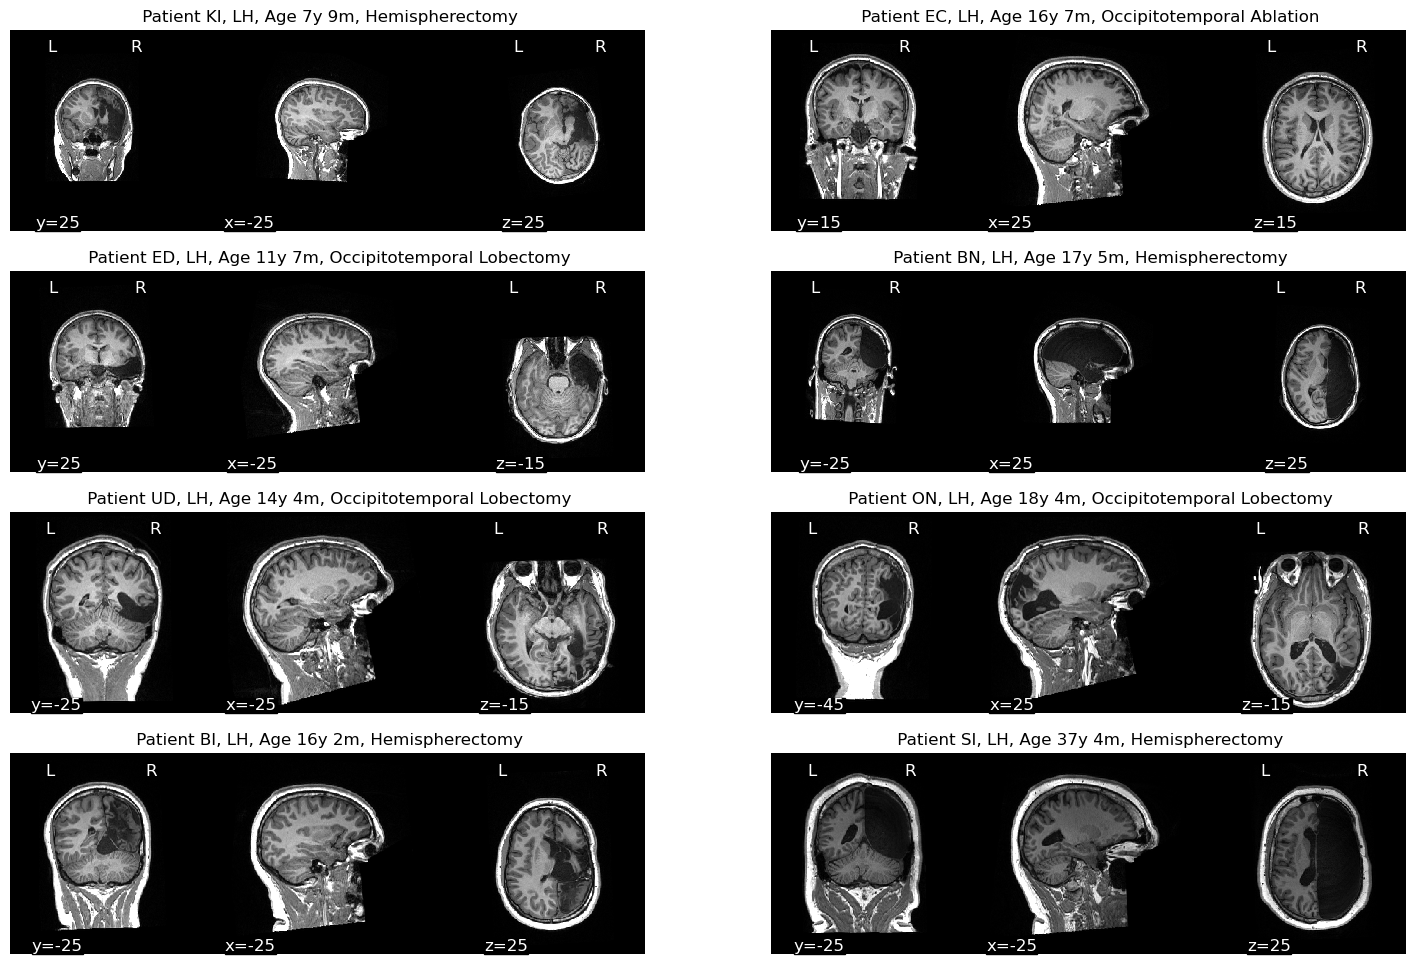

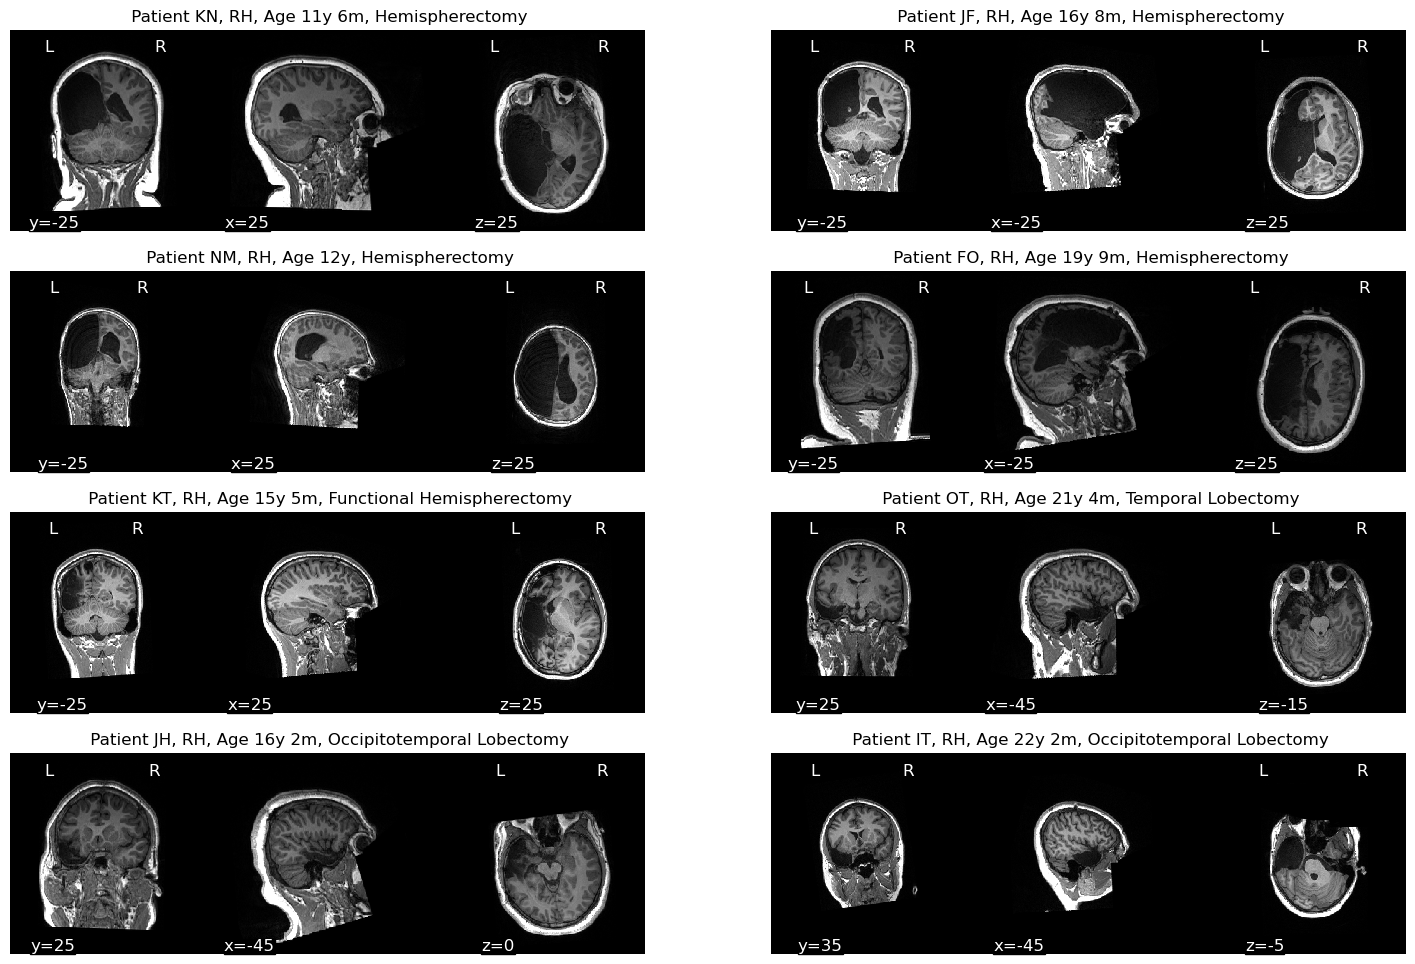

In [11]:
"""
Plot anatomical data: Select Subjects for Behavioral
"""

def plot_subject(sub_code, hemi, dim_val, ax, code, group, xcoord=None, ycoord=None, zcoord=None):
    sub_dir = f'{raw_dir}/{sub_code}/ses-01'
    anat = image.load_img(f'{sub_dir}/anat/{sub_code}_ses-01_T1w.nii.gz')
    
    if xcoord is None:
        xcoord = 25 if hemi == 'left' else -25
    
    if ycoord is None:
        ycoord = -25
    
    if zcoord is None:
        zcoord = 25
    
    display = plotting.plot_anat(anat, cut_coords=(xcoord, ycoord, zcoord), draw_cross=False, dim=dim_val, axes=ax)
    ax.title.set_text(f'{group} {code}')

import matplotlib.pyplot as plt

#dim_vals = [-1.25, -1.25, -1.25, -1.25]
dim_vals = [-1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
fig2, ax2 = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')


# Subject codes and their corresponding hemispheres and coordinates

# Intact RIGHT: sub-007, sub-076, sub-090, sub-092, sub-099, sub-066, sub-069, sub-078
# Intact LEFT: sub-089, sub-098, sub-101, sub-004, sub-075, sub-077, sub-079, sub-091 

left_patients = [
    ('sub-077','right', -25, 25, 25),
    ('sub-079','left', 25, 15, 15),
    ('sub-075','left', -25, 25, -15),
    ('sub-101', 'left'),
    ('sub-004','right', -25,-25,-15),
    ('sub-089', 'left', 25, -45, -15), 
    ('sub-098', 'right', -25, -25, 25), 
    ('sub-091', 'right') 
]
 
right_patients = [
    ('sub-099', 'left'),
    ('sub-066', 'right'),
    ('sub-069', 'left'),
    ('sub-092', 'right'),
    ('sub-090', 'left'),
    ('sub-007', 'left', -45, 25, -15),
    ('sub-076', 'right', -45, 25, 0),
    ('sub-078', 'right', -45, 35, -5)
]

controls = [
    ('sub-038', 'right', -25),
    ('sub-057', 'right', -25),
    ('sub-093', 'right', -25),
    ('sub-094', 'right', -25),
]

# Add individual titles for controls
#control_titles = ['1', '2', '3', '4']

#for i, (sub_code, hemi, *coords) in enumerate(controls):  # Use *coords to handle optional xcoord, ycoord, and zcoord
#    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
#    plot_subject(sub_code, hemi, dim_vals[i], ax[i, 0], control_titles[i], 'Control', xcoord, ycoord, zcoord)

left_titles = [
    'Patient KI, LH, Age 7y 9m, Hemispherectomy',
    'Patient EC, LH, Age 16y 7m, Occipitotemporal Ablation', 
    'Patient ED, LH, Age 11y 7m, Occipitotemporal Lobectomy',
    'Patient BN, LH, Age 17y 5m, Hemispherectomy', 
    'Patient UD, LH, Age 14y 4m, Occipitotemporal Lobectomy', 
    'Patient ON, LH, Age 18y 4m, Occipitotemporal Lobectomy', 
    'Patient BI, LH, Age 16y 2m, Hemispherectomy',
    'Patient SI, LH, Age 37y 4m, Hemispherectomy'
 ]

right_titles = [
    'Patient KN, RH, Age 11y 6m, Hemispherectomy', 
    'Patient JF, RH, Age 16y 8m, Hemispherectomy', 
    'Patient NM, RH, Age 12y, Hemispherectomy',
    'Patient FO, RH, Age 19y 9m, Hemispherectomy',
    'Patient KT, RH, Age 15y 5m, Functional Hemispherectomy',
    'Patient OT, RH, Age 21y 4m, Temporal Lobectomy', 
    'Patient JH, RH, Age 16y 2m, Occipitotemporal Lobectomy',
    'Patient IT, RH, Age 22y 2m, Occipitotemporal Lobectomy'
]

for i, (sub_code, hemi, *coords) in enumerate(left_patients):
    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
    row = i // 2  # Calculate the row for the current subject (0-3)
    col = i % 2  # Calculate the column for the current subject (0 or 1)
    plot_subject(sub_code, hemi, dim_vals[i], ax[row, col], left_titles[i], '', xcoord, ycoord, zcoord)

for i, (sub_code, hemi, *coords) in enumerate(right_patients):
    xcoord, ycoord, zcoord = coords if len(coords) == 3 else (None, None, None)
    row = i // 2  # Calculate the row for the current subject (0-3)
    col = i % 2  # Calculate the column for the current subject (0 or 1)
    plot_subject(sub_code, hemi, dim_vals[i], ax2[row, col], right_titles[i], '', xcoord, ycoord, zcoord)

dpi = 300

fig.savefig('left_patients.png', dpi=dpi, bbox_inches='tight')
fig2.savefig('right_patients.png', dpi=dpi, bbox_inches='tight')
    
plt.show()
plt.pause(0.0001)

In [ ]:
"""
Plot anatomical data simplified from Vlad's code
"""
dim_vals = [-1,-1,.25,-1.25,-1.5,-1.25,-1.25,-1.25]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
l_row = -1
r_row = -1
n = 0
for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
    print(code)
    sub_dir = f'{data_dir}/{sub}/ses-01'

    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
        xcoord = 25
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
        xcoord = -25

    #load anatomical data
    anat = image.load_img(f'{raw_dir}/{sub}/ses-01/anat/{sub}_ses-01_T1w.nii.gz')
    #anat = f'{sub_dir}/anat/{sub}_ses-01_T1w.nii.gz'

    display = plotting.plot_anat(anat, cut_coords = (xcoord,0,25), draw_cross = False,dim = dim_vals[n],axes=ax[row,hemi_col])

    ax[row,hemi_col].title.set_text(f'Patient {code}')

    n = n+1

#display.savefig(f'{fig_dir}/anatomicals_head.jpg') 
plt.show()
plt.pause(0.0001)

In [ ]:
'''
Plot ROIs on each patient #consider which patients are displayed  - needs to be adapted to PTOC
'''
l_row = -1
r_row = -1
n =0
z_coord = [30,30,45,30,30,30,30,55]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12), facecolor='w')
for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
    print(code)
    sub_dir = f'{data_dir}/{sub}/ses-01'

    if hemi == 'left':
        hemi_col = 0
        l_row = l_row +1
        row = l_row
        xcoord = -25
    else:
        hemi_col = 1
        r_row = r_row + 1
        row = r_row
        xcoord = 25

    #load anatomical
    anat = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain.nii.gz')

    hemi_mask = image.load_img(f'{sub_dir}/anat/{sub}_ses-01_T1w_brain_mask_{hemi}.nii.gz')
    
    #load rois
    ventral_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/ventral_visual_cortex.nii.gz')
    dorsal_roi = image.load_img(f'{sub_dir}/derivatives/rois/parcels/dorsal_visual_cortex.nii.gz')

    #combine rois
    roi = image.math_img('a+b', a=ventral_roi, b=dorsal_roi)
    #multiple by hemi mask
    roi = image.math_img('a*b', a=roi, b=hemi_mask)

    #binarize mask
    roi = image.math_img('img > 0', img=roi)

    display = plotting.plot_roi(roi, bg_img = anat,draw_cross = False, cut_coords = (xcoord,-50,z_coord[n]), axes=ax[row,hemi_col])

    ax[row,hemi_col].title.set_text(f'Patient {code}')

    n = n+1

#display.savefig(f'{fig_dir}/anatomicals_head.jpg') 
plt.show()

    



2.58 word


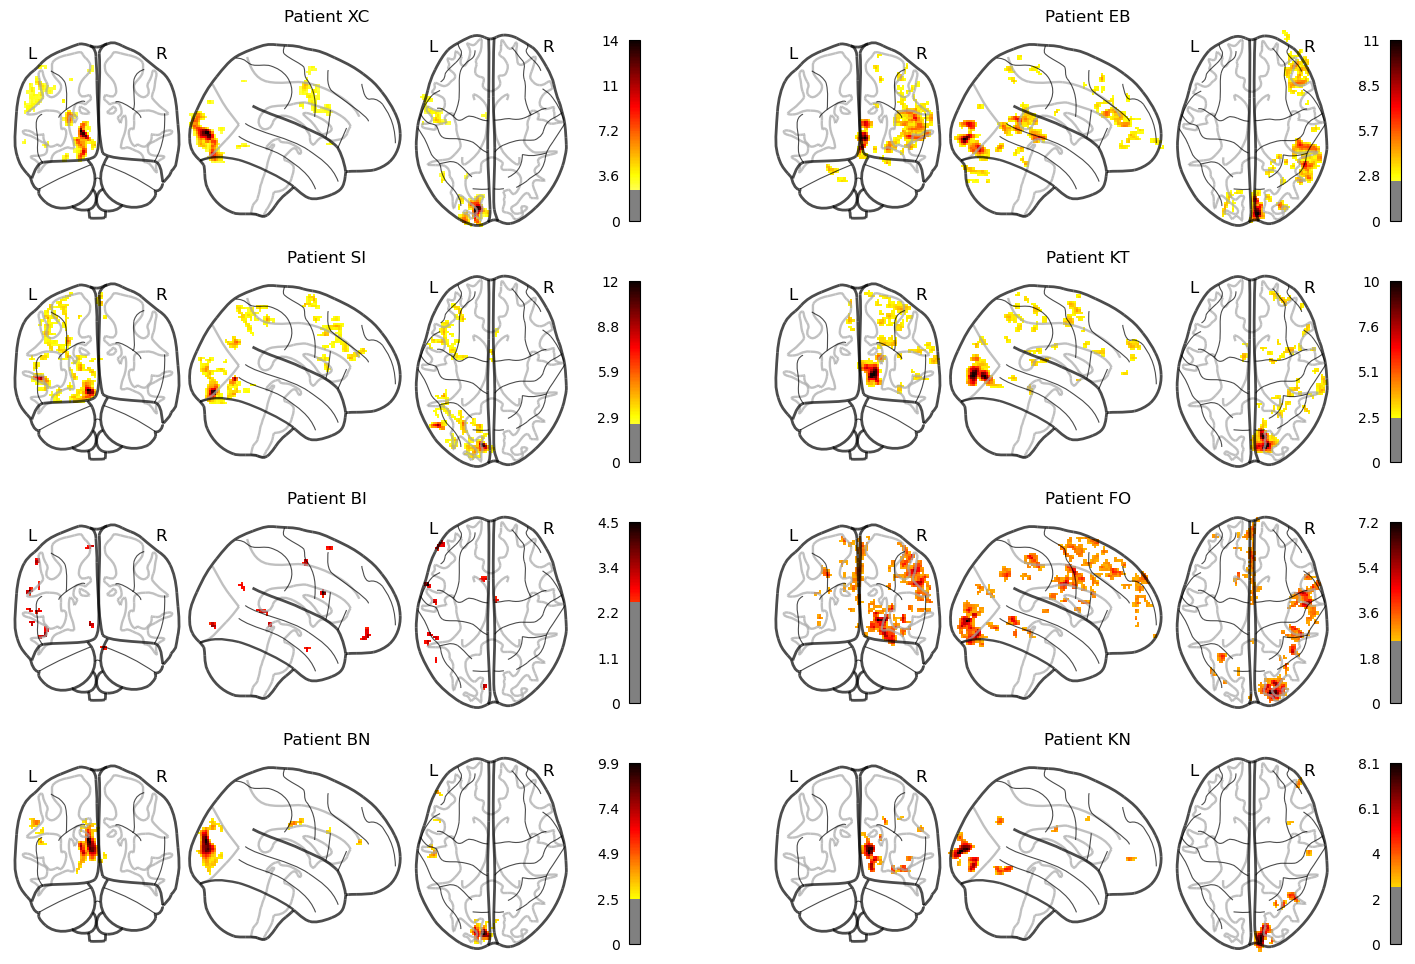

2.58 face


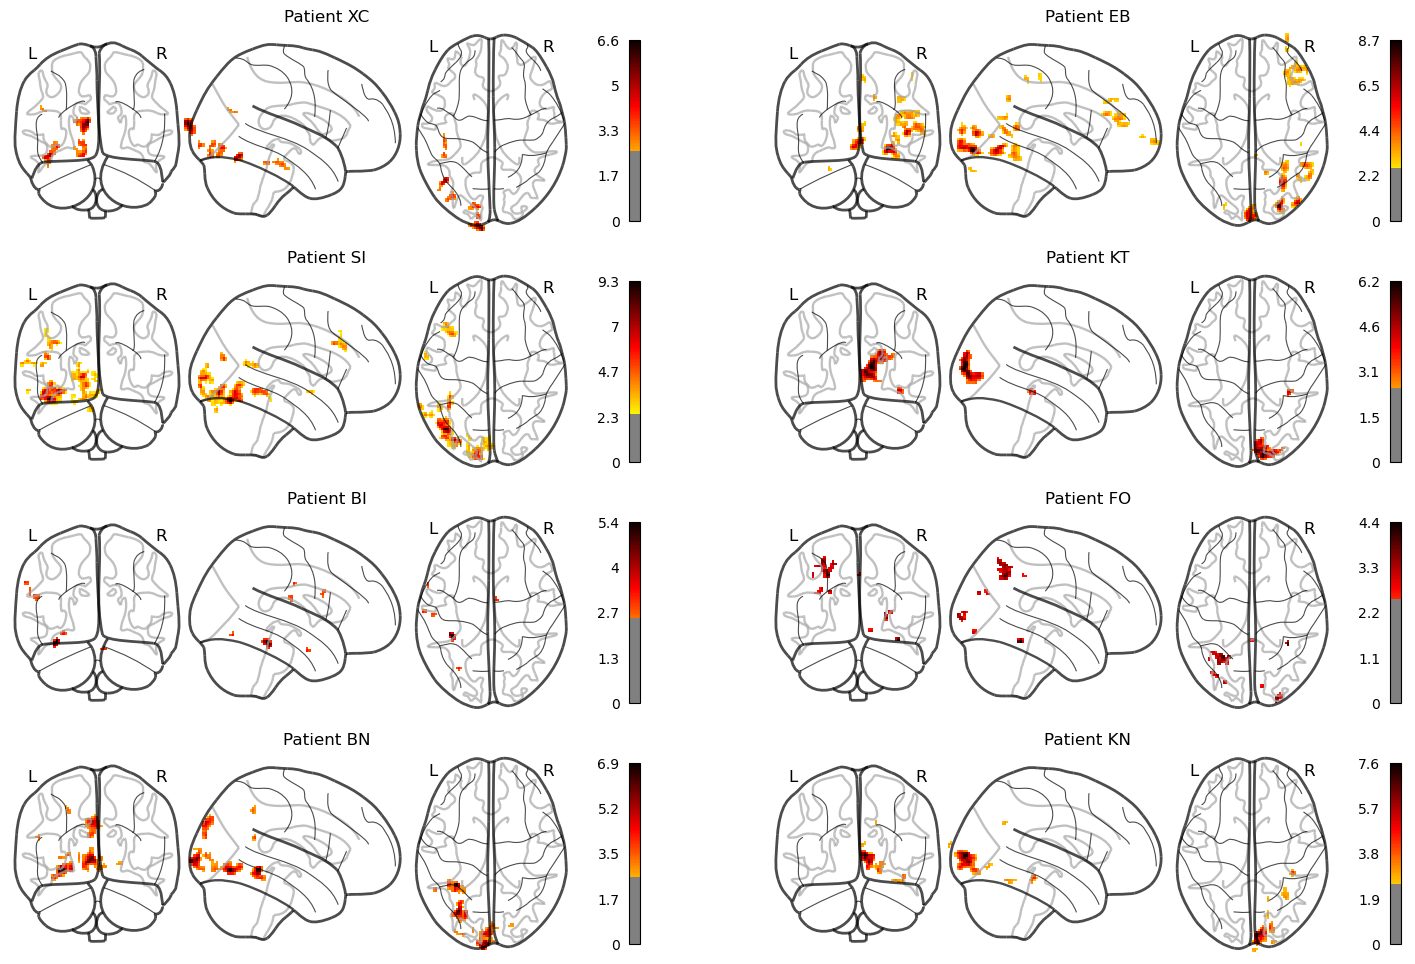

2.58 tool


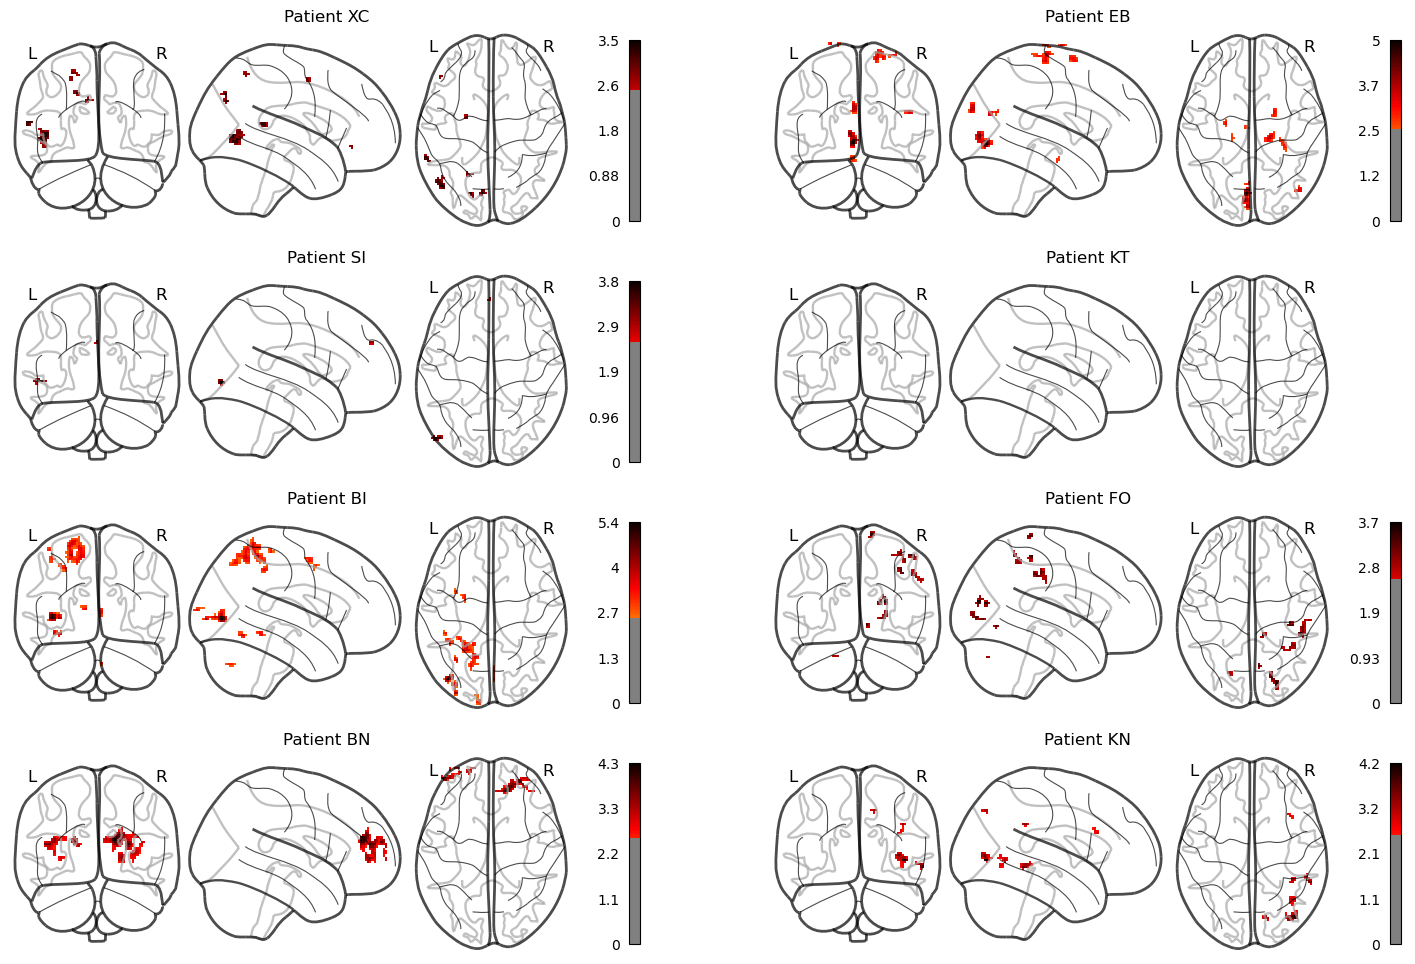

2.58 space


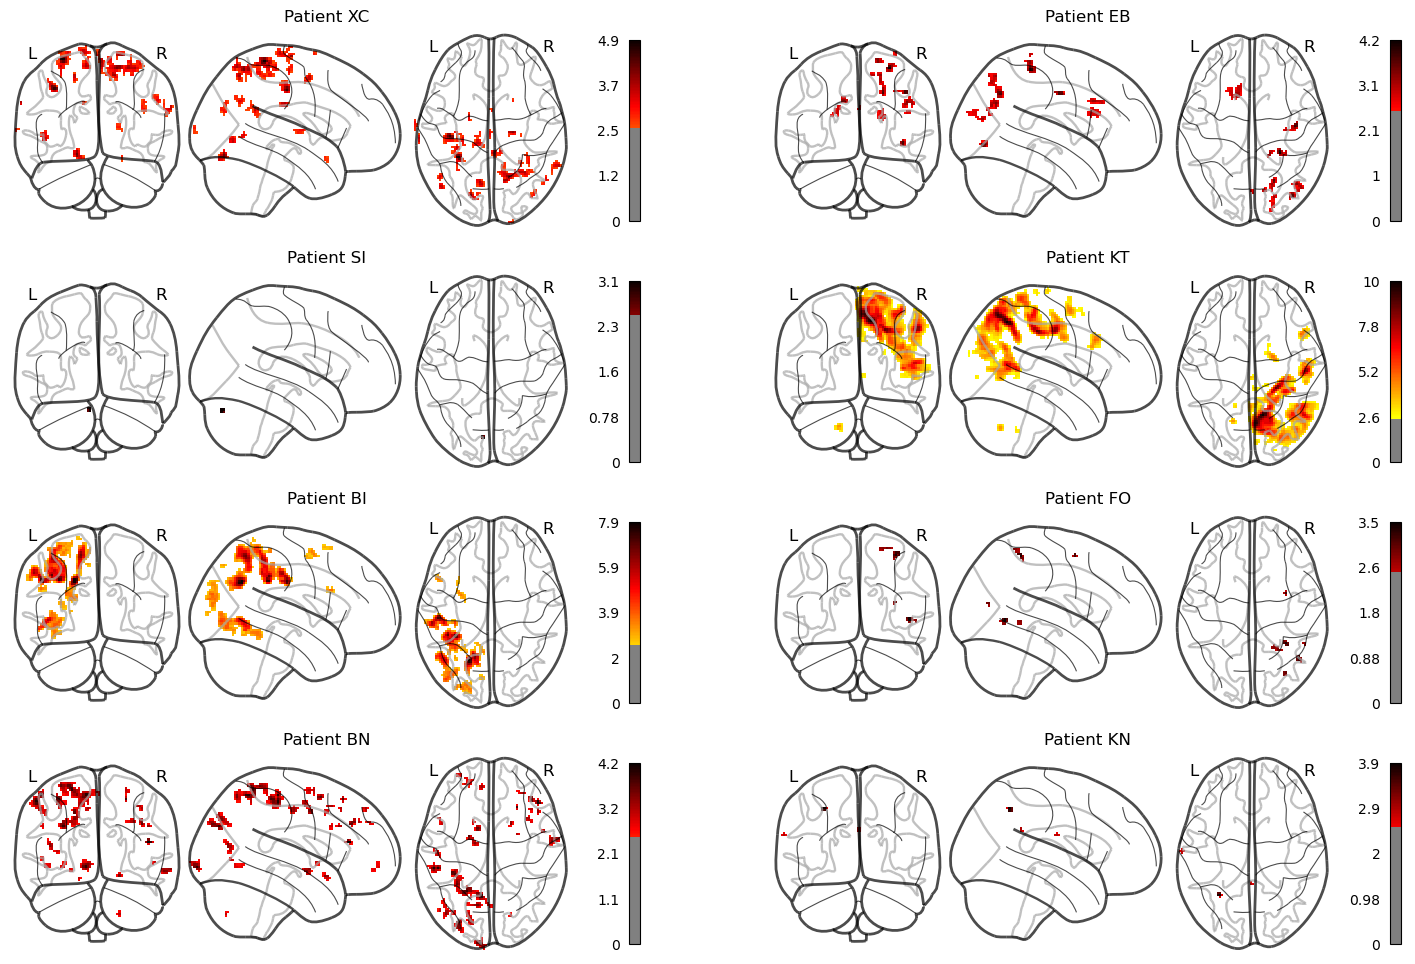

In [3]:
"""
Plot functional data on glass brain - needs to be adapted to PTOC
"""

for task,cond, cope in zip(task_info['task'], task_info['cond'],task_info['cope']):
    print(thresh,cond)
    os.makedirs(f'{fig_dir}/glass_brain/{cond}', exist_ok=True)
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
    
    l_row = -1
    r_row = -1
    for sub, code, hemi in zip(sub_info['sub'], sub_info['code'], sub_info['intact_hemi']):
        sub_dir = f'{data_dir}/{sub}/ses-01'
    
        if hemi == 'left':
            hemi_col = 0
            l_row = l_row +1
            row = l_row
        else:
            hemi_col = 1
            r_row = r_row + 1
            row = r_row
        
        #register each highlevel to anat
        zstat_path = f'{sub_dir}/derivatives/fsl/{task}/HighLevel.gfeat/cope{cope}.feat/stats/zstat1_reg.nii.gz'

        #check if zstat exists
        if os.path.exists(zstat_path):
            #load zstat
            zstat = image.load_img(zstat_path)
            #
            zstat = image.threshold_img(zstat,thresh, cluster_threshold=5, two_sided=False)
            #zstat = image.clean_img(zstat,mask_img=mni)
            #create figure



            display = plotting.plot_glass_brain(zstat, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
            ax[row,hemi_col].title.set_text(f'Patient {code}')

        else:
            display = plotting.plot_glass_brain(mni, axes=ax[row,hemi_col],threshold = thresh, draw_cross = False, colorbar = True)
            ax[row,hemi_col].title.set_text(f'Patient {code}')
            

    display.savefig(f'{fig_dir}/glass_brain/{cond}_glass_brain.png') 
    plt.show()
    plt.pause(0.0001)

              

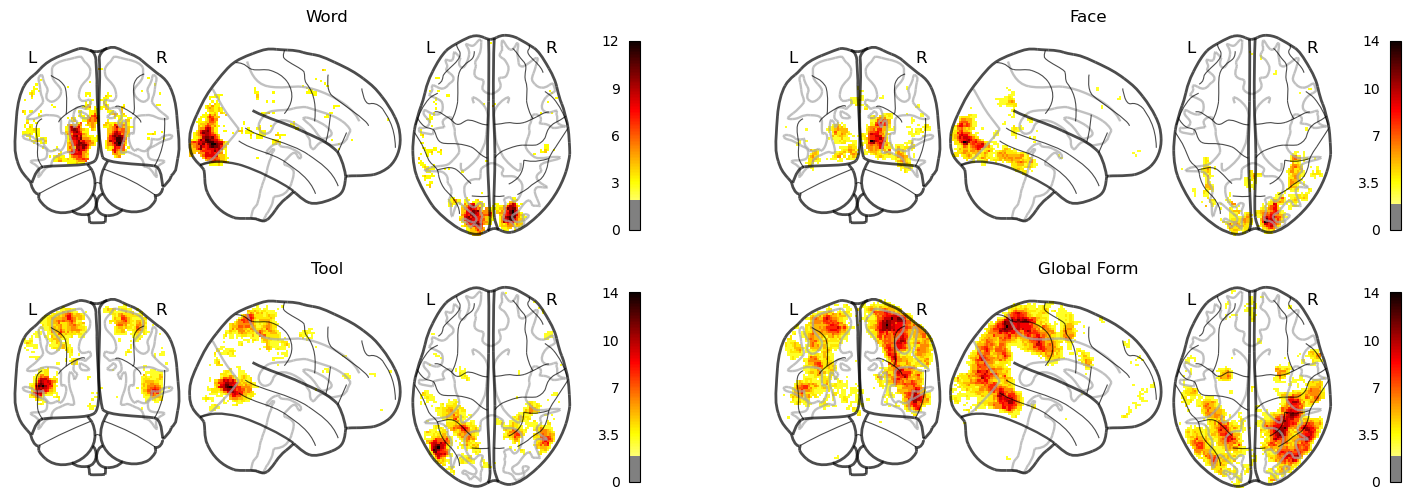

In [6]:
'''Plot control group data on glass brain - needs to be adapted to PTOC'''
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
for cond in task_info['cond']:
    
    os.makedirs(f'{fig_dir}/glass_brain/{cond}', exist_ok=True)
    if cond == 'word':
        row = 0
        col =0
        cond_name = 'Word'
    elif cond == 'face':
        row = 0
        col = 1
        cond_name = 'Face'
    elif cond == 'tool':
        row = 1
        col = 0
        cond_name = 'Tool'
    elif cond == 'space':
        row = 1
        col =1
        cond_name = 'Global Form'



    #load image
    group_map = image.load_img(f'{results_dir}/neural_map/{cond}_group.nii.gz')


    display = plotting.plot_glass_brain(group_map, axes=ax[row,col],threshold = 2, draw_cross = False, colorbar = True)
    ax[row,col].title.set_text(f'{cond_name}')

display.savefig(f'{fig_dir}/glass_brain/control_{cond}.png') 
plt.show()
plt.pause(0.0001)

